In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor


In [7]:
df=pd.read_csv('/home/chinghia/DataScience/Data/Exam_Score_Prediction.csv',index_col='student_id')

In [8]:
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20001
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.0+ MB


In [10]:
categogy=['gender','course','internet_access','sleep_quality','study_method','facility_rating','exam_difficulty']
for col in categogy:
    df[col]=df[col].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20001
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  int8   
 2   course            20000 non-null  int8   
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  int8   
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  int8   
 8   study_method      20000 non-null  int8   
 9   facility_rating   20000 non-null  int8   
 10  exam_difficulty   20000 non-null  int8   
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), int8(7)
memory usage: 1.0 MB


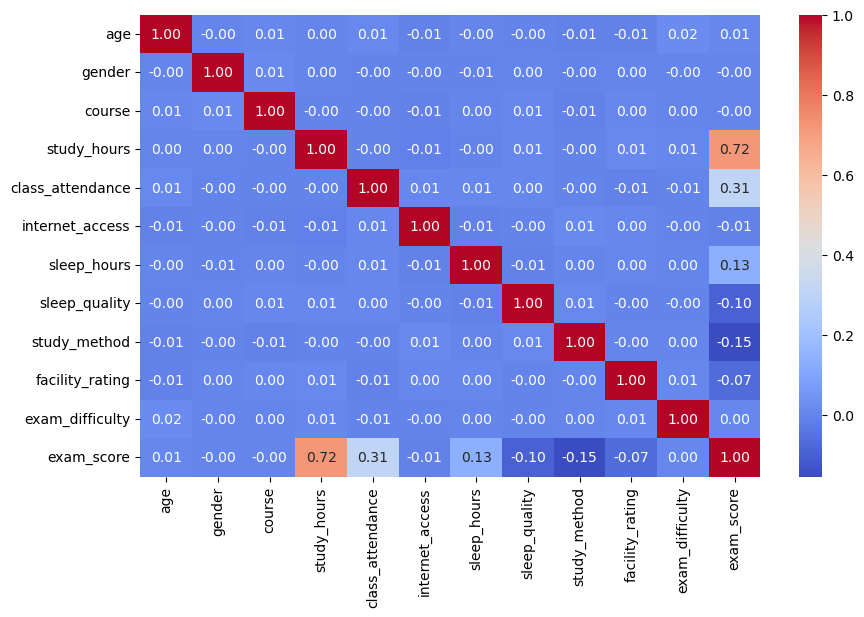

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:
df_drop=df.drop('exam_score', axis=1)

In [13]:
df_drop.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
student_id,,,,,,,,,,,
1,17,1,6,2.78,92.9,1,7.4,2,0,1,1
2,23,2,5,3.37,64.8,1,4.6,0,3,2,2
3,22,1,1,7.88,76.8,1,8.5,2,0,0,2
4,20,2,6,0.67,48.4,1,5.8,0,3,1,2
5,20,0,6,0.89,71.6,1,9.8,2,0,1,2


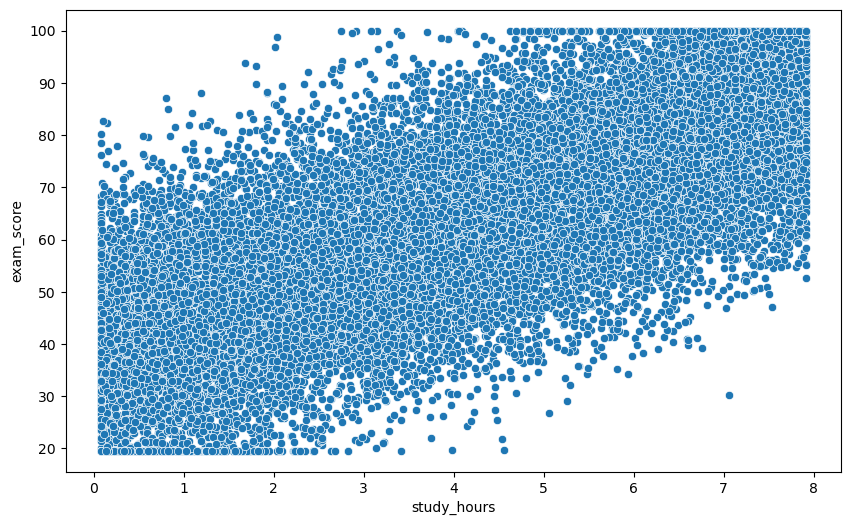

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.show()

In [15]:
X=df_drop
y=df['exam_score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rd = RandomForestRegressor(n_estimators=1000,n_jobs=-1, max_depth=20, random_state=42)
rd.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [ ]:
y_pred=rd.predict(X_test)
score=rd.score(X_test,y_test)
score

0.6951617351906695

C:\Users\Asus\AppData\Local\Temp\ipykernel_10432\807008539.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')


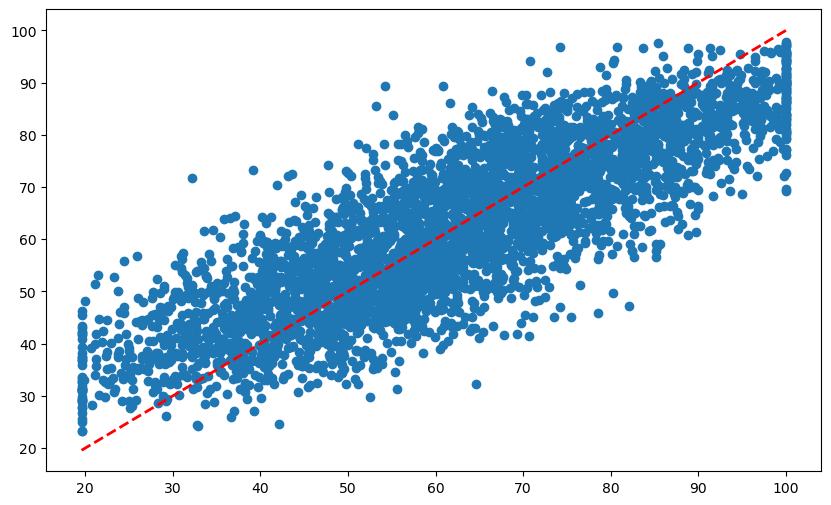

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')
plt.show()

In [ ]:
xgb=XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=20, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xgb.predict(X_test)
score=xgb.score(X_test,y_test)
score

0.6377697980671552

C:\Users\Asus\AppData\Local\Temp\ipykernel_10432\2875984683.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')


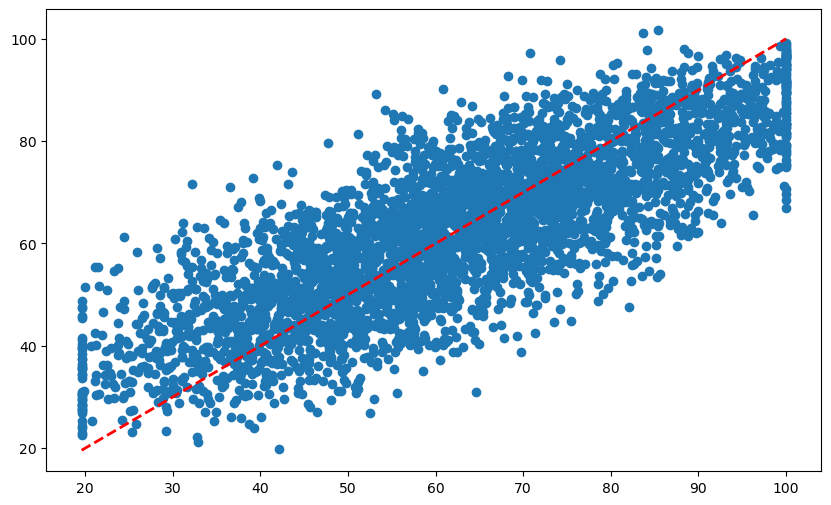

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')

In [ ]:
model=VotingRegressor(estimators=[('RandomForest', rd), ('XGBoost', xgb)])
model.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)
score=model.score(X_test,y_test)
score

0.6773849321756887

C:\Users\Asus\AppData\Local\Temp\ipykernel_23576\2875984683.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')


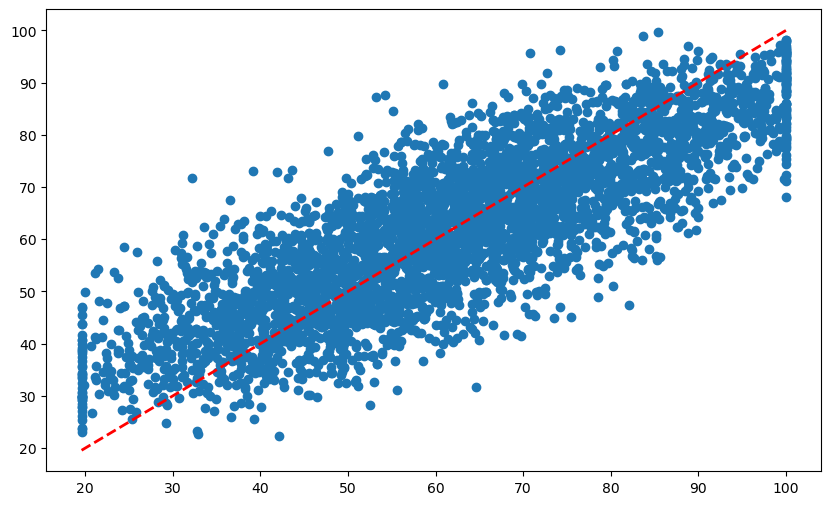

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red')